### PCA - Principal Component Analysis


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [4]:
# o arquivo CSV lido é resultado das etapas anteriores do Pipeline desenvolvido:
data = pd.read_csv('data/04.2 - reacoes_dummy_encoded.csv', index_col=0)

data.sample(5)


,2 +w,2 -,2 -+,2 -c,2 -w,2 w,3 +w,3 -,3 -+,3 -c,...,43 w,44 -,49 -,49 w,50 -,51 -,52 -,53 -,65 -,66 -
UFT.2014(L)7989,0,1,0,0,0,0,0,1,0,0,...,0,1,1,0,1,0,0,0,1,1
UFT.2014(L)7936,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,1
UFT.2014(L)6893,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
UFT.2015(L)8557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
UFT.2014(L)7952,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


### 5 - Redução de Dimensionalidade
Anteriormente vimos que podemos ter o resultado do Encoding através de One-Hot Encoding e 
Dummy Encoding (ambos aplicados através do Pandas.gert_dummies() --com e sem o drop_first).

Agora temos um dataframe com o dobro ou o triplo de colunas. Será que podemos eliminar algumas dessas colunas
(sem perda de generalidades) a fim de deixar nosso dataframe mais leve para o **Processamento**?

In [5]:
# 5.1 PCA - Principal Component Analysis:
# https://medium.com/edureka/principal-component-analysis-69d7a4babc96

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [6]:
X_std = StandardScaler().fit_transform(data)
X_std


array([[-0.07082882,  1.70370109, -0.04082483, ...,  1.37456287,
         1.33025759,  1.29271463],
       [-0.07082882, -0.58695742, -0.04082483, ..., -0.72750401,
        -0.75173411, -0.77356593],
       [-0.07082882, -0.58695742, -0.04082483, ..., -0.72750401,
        -0.75173411, -0.77356593],
       ...,
       [-0.07082882,  1.70370109, -0.04082483, ..., -0.72750401,
        -0.75173411, -0.77356593],
       [-0.07082882, -0.58695742, -0.04082483, ..., -0.72750401,
        -0.75173411, -0.77356593],
       [-0.07082882, -0.58695742, -0.04082483, ..., -0.72750401,
        -0.75173411, -0.77356593]])

In [7]:
# Compute covariance matrix:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix n%s' %cov_mat)


Covariance matrix n[[ 1.00166667 -0.04164279 -0.00289639 ... -0.05161413 -0.05333318
  -0.05488208]
 [-0.04164279  1.00166667 -0.02400237 ... -0.09066735  0.37672969
   0.30249589]
 [-0.00289639 -0.02400237  1.00166667 ... -0.02974973 -0.03074057
  -0.03163333]
 ...
 [-0.05161413 -0.09066735 -0.02974973 ...  1.00166667  0.45879067
   0.44976371]
 [-0.05333318  0.37672969 -0.03074057 ...  0.45879067  1.00166667
   0.77263829]
 [-0.05488208  0.30249589 -0.03163333 ...  0.44976371  0.77263829
   1.00166667]]


In [8]:
# Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)


Eigenvectors n[[ 3.78396892e-03+0.j  1.66394959e-01+0.j  2.15518455e-01+0.j ...
   2.42563939e-02+0.j  1.55764063e-02+0.j -4.49977622e-03+0.j]
 [-1.26221844e-01+0.j  6.44655660e-02+0.j -6.65923859e-02+0.j ...
   4.98240762e-16+0.j  4.50657012e-16+0.j -3.94554235e-16+0.j]
 [ 6.14267840e-03+0.j -2.08750517e-03+0.j -3.24605168e-05+0.j ...
   2.73299591e-02+0.j -3.29017667e-03+0.j -6.93449879e-02+0.j]
 ...
 [-7.93146314e-02+0.j  2.45538094e-03+0.j -2.26849376e-02+0.j ...
   2.73487110e-16+0.j  3.11386517e-16+0.j  7.03537707e-17+0.j]
 [-1.46940785e-01+0.j  6.59620620e-02+0.j -6.91292182e-02+0.j ...
  -4.69840131e-16+0.j -1.54824396e-16+0.j  5.31719055e-16+0.j]
 [-1.38625910e-01+0.j  5.56118842e-02+0.j -6.21984425e-02+0.j ...
  -1.37912948e-16+0.j -2.71198947e-16+0.j -2.80171272e-16+0.j]]
nEigenvalues n[ 1.83558805e+01+0.00000000e+00j  1.29744543e+01+0.00000000e+00j
  1.17953259e+01+0.00000000e+00j  8.31772302e+00+0.00000000e+00j
  7.07465708e+00+0.00000000e+00j  6.62891213e+00+0.00000000e+0

In [9]:
# Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)


Eigenvectors n[[ 3.78396892e-03+0.j  1.66394959e-01+0.j  2.15518455e-01+0.j ...
   2.42563939e-02+0.j  1.55764063e-02+0.j -4.49977622e-03+0.j]
 [-1.26221844e-01+0.j  6.44655660e-02+0.j -6.65923859e-02+0.j ...
   4.98240762e-16+0.j  4.50657012e-16+0.j -3.94554235e-16+0.j]
 [ 6.14267840e-03+0.j -2.08750517e-03+0.j -3.24605168e-05+0.j ...
   2.73299591e-02+0.j -3.29017667e-03+0.j -6.93449879e-02+0.j]
 ...
 [-7.93146314e-02+0.j  2.45538094e-03+0.j -2.26849376e-02+0.j ...
   2.73487110e-16+0.j  3.11386517e-16+0.j  7.03537707e-17+0.j]
 [-1.46940785e-01+0.j  6.59620620e-02+0.j -6.91292182e-02+0.j ...
  -4.69840131e-16+0.j -1.54824396e-16+0.j  5.31719055e-16+0.j]
 [-1.38625910e-01+0.j  5.56118842e-02+0.j -6.21984425e-02+0.j ...
  -1.37912948e-16+0.j -2.71198947e-16+0.j -2.80171272e-16+0.j]]
nEigenvalues n[ 1.83558805e+01+0.00000000e+00j  1.29744543e+01+0.00000000e+00j
  1.17953259e+01+0.00000000e+00j  8.31772302e+00+0.00000000e+00j
  7.07465708e+00+0.00000000e+00j  6.62891213e+00+0.00000000e+0

In [10]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


Eigenvalues in descending order:
18.355880526140496
12.974454273901708
11.795325895887386
8.317723016807335
7.074657083100708
6.628912125633445
4.86878434676435
4.692679321622074
4.516080296994935
4.2620795412880215
3.1105447550315337
3.0015432232101924
2.7595316111283132
2.672376417379661
2.266858884623616
2.1834054821000963
1.9256327479618986
1.8539308342951226
1.5932935436103264
1.5773140737688887
1.4773489078953552
1.414585232879873
1.3757474227558313
1.3460530873945005
1.3228544622470855
1.2743890807080904
1.2402332786730312
1.1982587596844845
1.154326300899112
1.1210177378876134
1.0960540811731245
1.0652145653478193
1.074290333739024
1.0208018321275216
1.0089397683719483
0.9854127615027368
0.9595179321461991
0.9316437804570902
0.9198377652072343
0.898328284301125
0.8612488425451413
0.8339067094601796
0.8179456042340886
0.7865211524694964
0.7432789803547549
0.7283829357180461
0.6919826693035782
0.6525460200614969
0.620758845195362
0.6081314103485157
0.5620797013133244
0.5492608540

In [12]:
pca = PCA(n_components=2)
pca.fit_transform(data)
print(pca.explained_variance_ratio_)


[0.33303613 0.09989027]


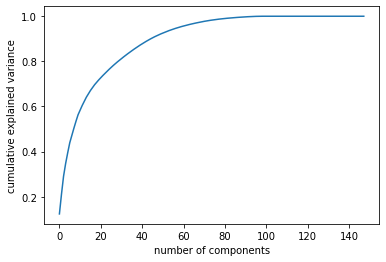

In [13]:
# Projecting the variance w.r.t the Principle Components:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
